<center>

# **Optimizing Bank Marketing Strategies: A Predictive Approach**

</center>

### **Dataset: Bank Target Marketing Dataset**

- **Link:** https://www.kaggle.com/datasets/seanangelonathanael/bank-target-marketing


## About Dataset

This dataset, named Bank Target Marketing Dataset, contains information related to a bank's marketing campaign aimed at promoting term deposits. It includes various fields pertaining to the customers who were targeted for the marketing campaign.

**Fields:**

- **age:** Age of the customer.
- **job:** Occupation of the customer.
- **marital:** Marital status of the customer.
- **education:** Educational level of the customer.
- **default:** Indicates whether the customer has credit in default (yes/no).
- **balance:** Account balance of the customer.
- **housing:** Indicates whether the customer has a housing loan (yes/no).
- **loan:** Indicates whether the customer has a personal loan (yes/no).
- **contact:** Type of communication contact.
- **day:** Day of the month when the contact was made.
- **month:** Month of the year when the contact was made.
- **duration:** Duration of the last contact in seconds.
- **campaign:** Number of contacts performed during this campaign for this customer.
- **pdays:** Number of days that passed by after the customer was last contacted from a previous campaign (-1 indicates the customer was not previously contacted).
- **previous:** Number of contacts performed before this campaign for this customer.
- **poutcome:** Outcome of the previous marketing campaign.
- **deposit:** Indicates whether the customer subscribed to a term deposit (yes/no).

This dataset is valuable for analyzing customer attributes and behavior in the context of marketing campaigns for term deposits.


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

## Loading the dataset

In [2]:
data = pd.read_csv("Bank Target Marketing Dataset.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
56369,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
56370,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
56371,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Display the first few rows of the dataset

In [3]:
print(data.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [4]:
# Summary statistics
print(data.describe())

                age        balance           day      duration      campaign  \
count  56373.000000   56373.000000  56373.000000  56373.000000  56373.000000   
mean      40.994767    1395.193249     15.777039    280.701861      2.713267   
std       10.887854    3082.058457      8.342159    281.253563      3.028980   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      81.000000      8.000000    108.000000      1.000000   
50%       39.000000     469.000000     16.000000    192.000000      2.000000   
75%       49.000000    1489.000000     21.000000    346.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  56373.000000  56373.000000  
mean      42.402107      0.630266  
std      101.990991      2.303356  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [5]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


# Exploratory Data Analysis

## Plot Distribution of the target variable 'deposit

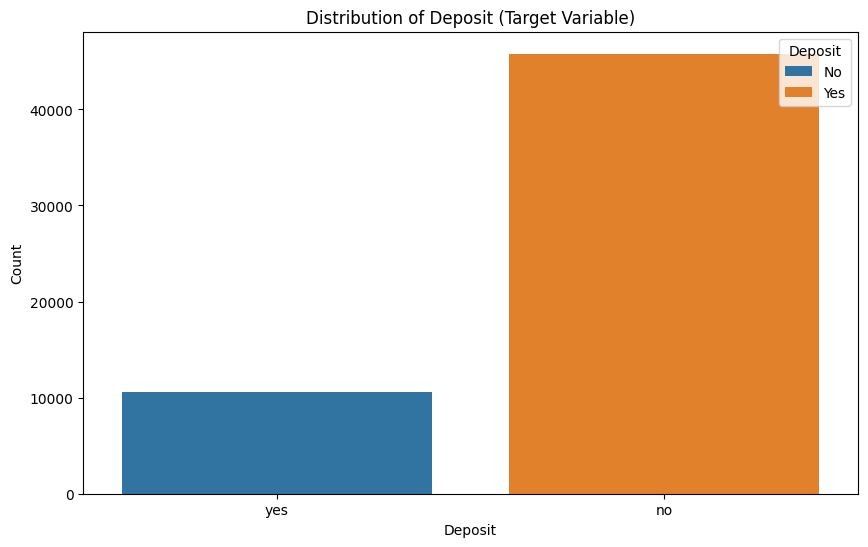

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit', data=data, hue='deposit')
plt.title('Distribution of Deposit (Target Variable)')
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.legend(title='Deposit', labels=['No', 'Yes'], loc='upper right')
plt.show()


## Plot Distribution of numerical variables

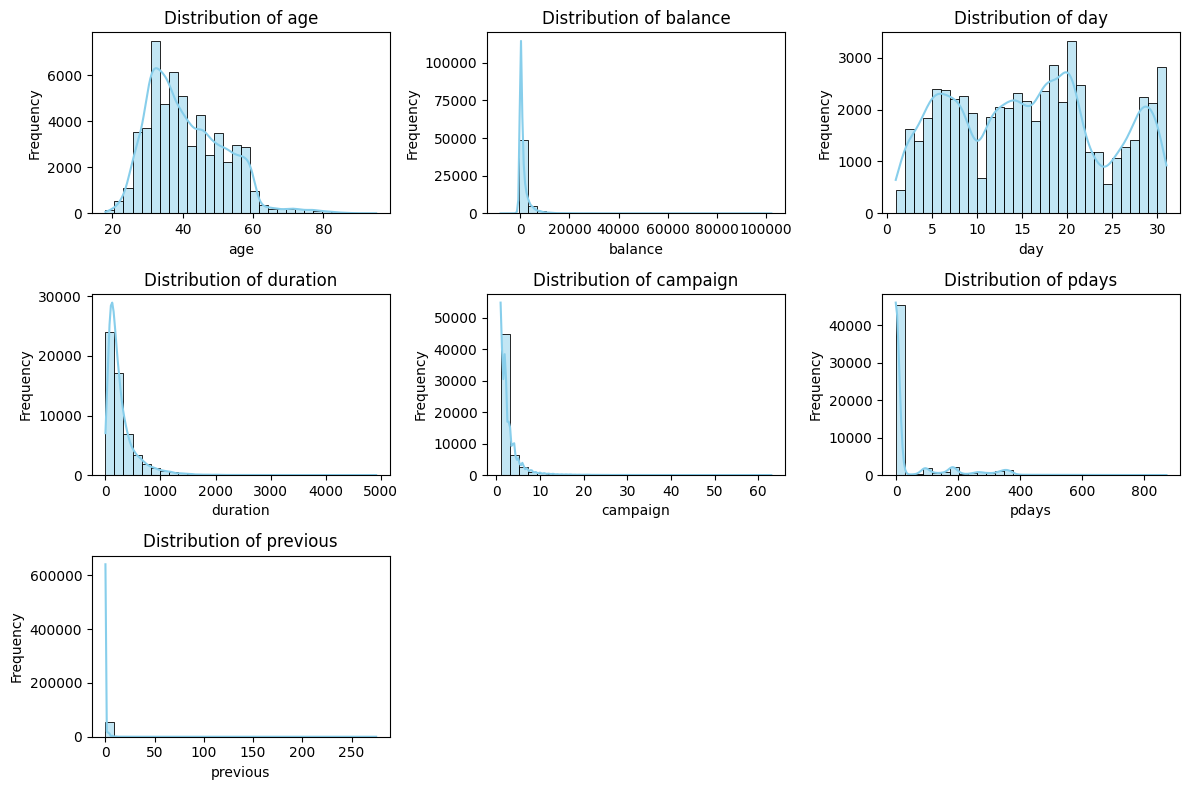

In [7]:
plt.figure(figsize=(12, 8))
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Exploring the Relationship between 'age' and 'deposit'

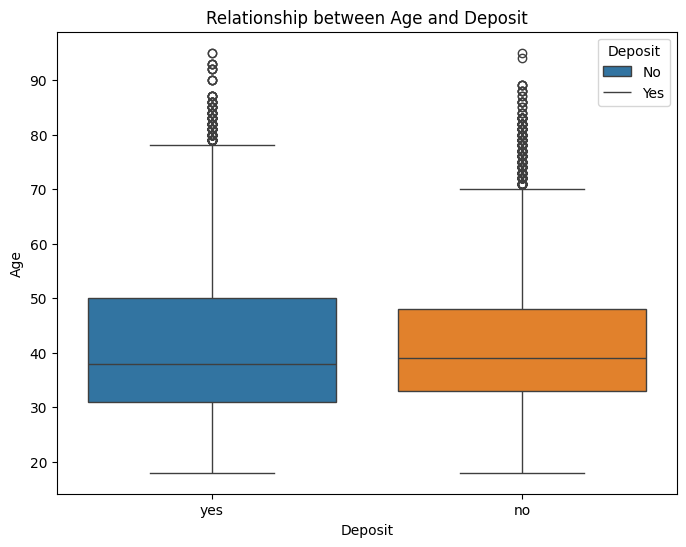

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='age', data=data, hue='deposit')
plt.title('Relationship between Age and Deposit')
plt.xlabel('Deposit')
plt.ylabel('Age')
plt.legend(title='Deposit', labels=['No', 'Yes'], loc='upper right')
plt.show()

## Exploring the Relationship between 'job' and 'deposit'

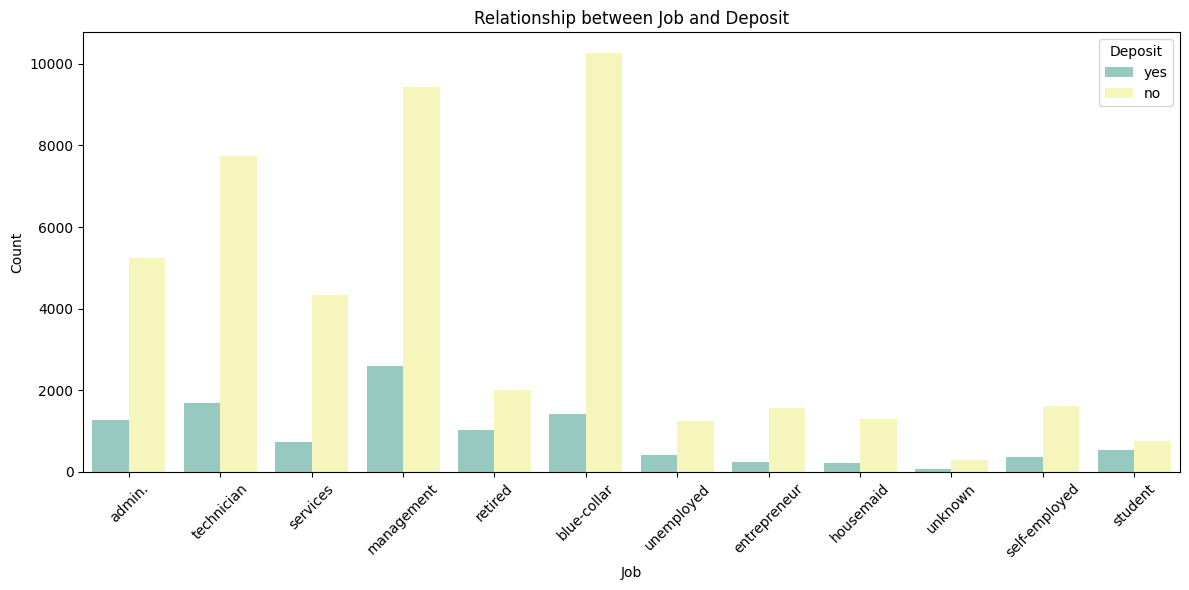

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='deposit', data=data, palette='Set3')
plt.title('Relationship between Job and Deposit')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit', loc='upper right')
plt.tight_layout()
plt.show()

## Correlation heatmap of numerical variables

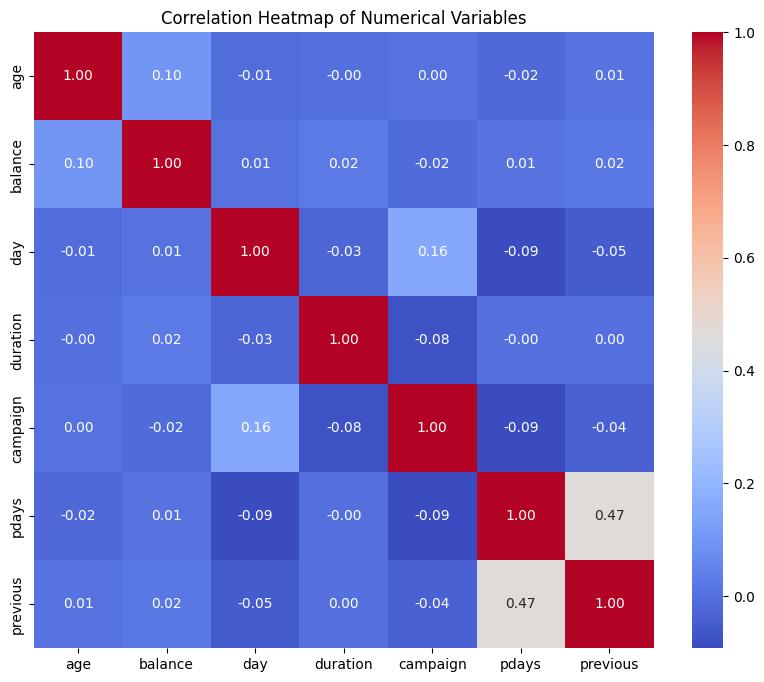

In [10]:
plt.figure(figsize=(10, 8))
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Visualization of Subplots for distribution of categorical variables

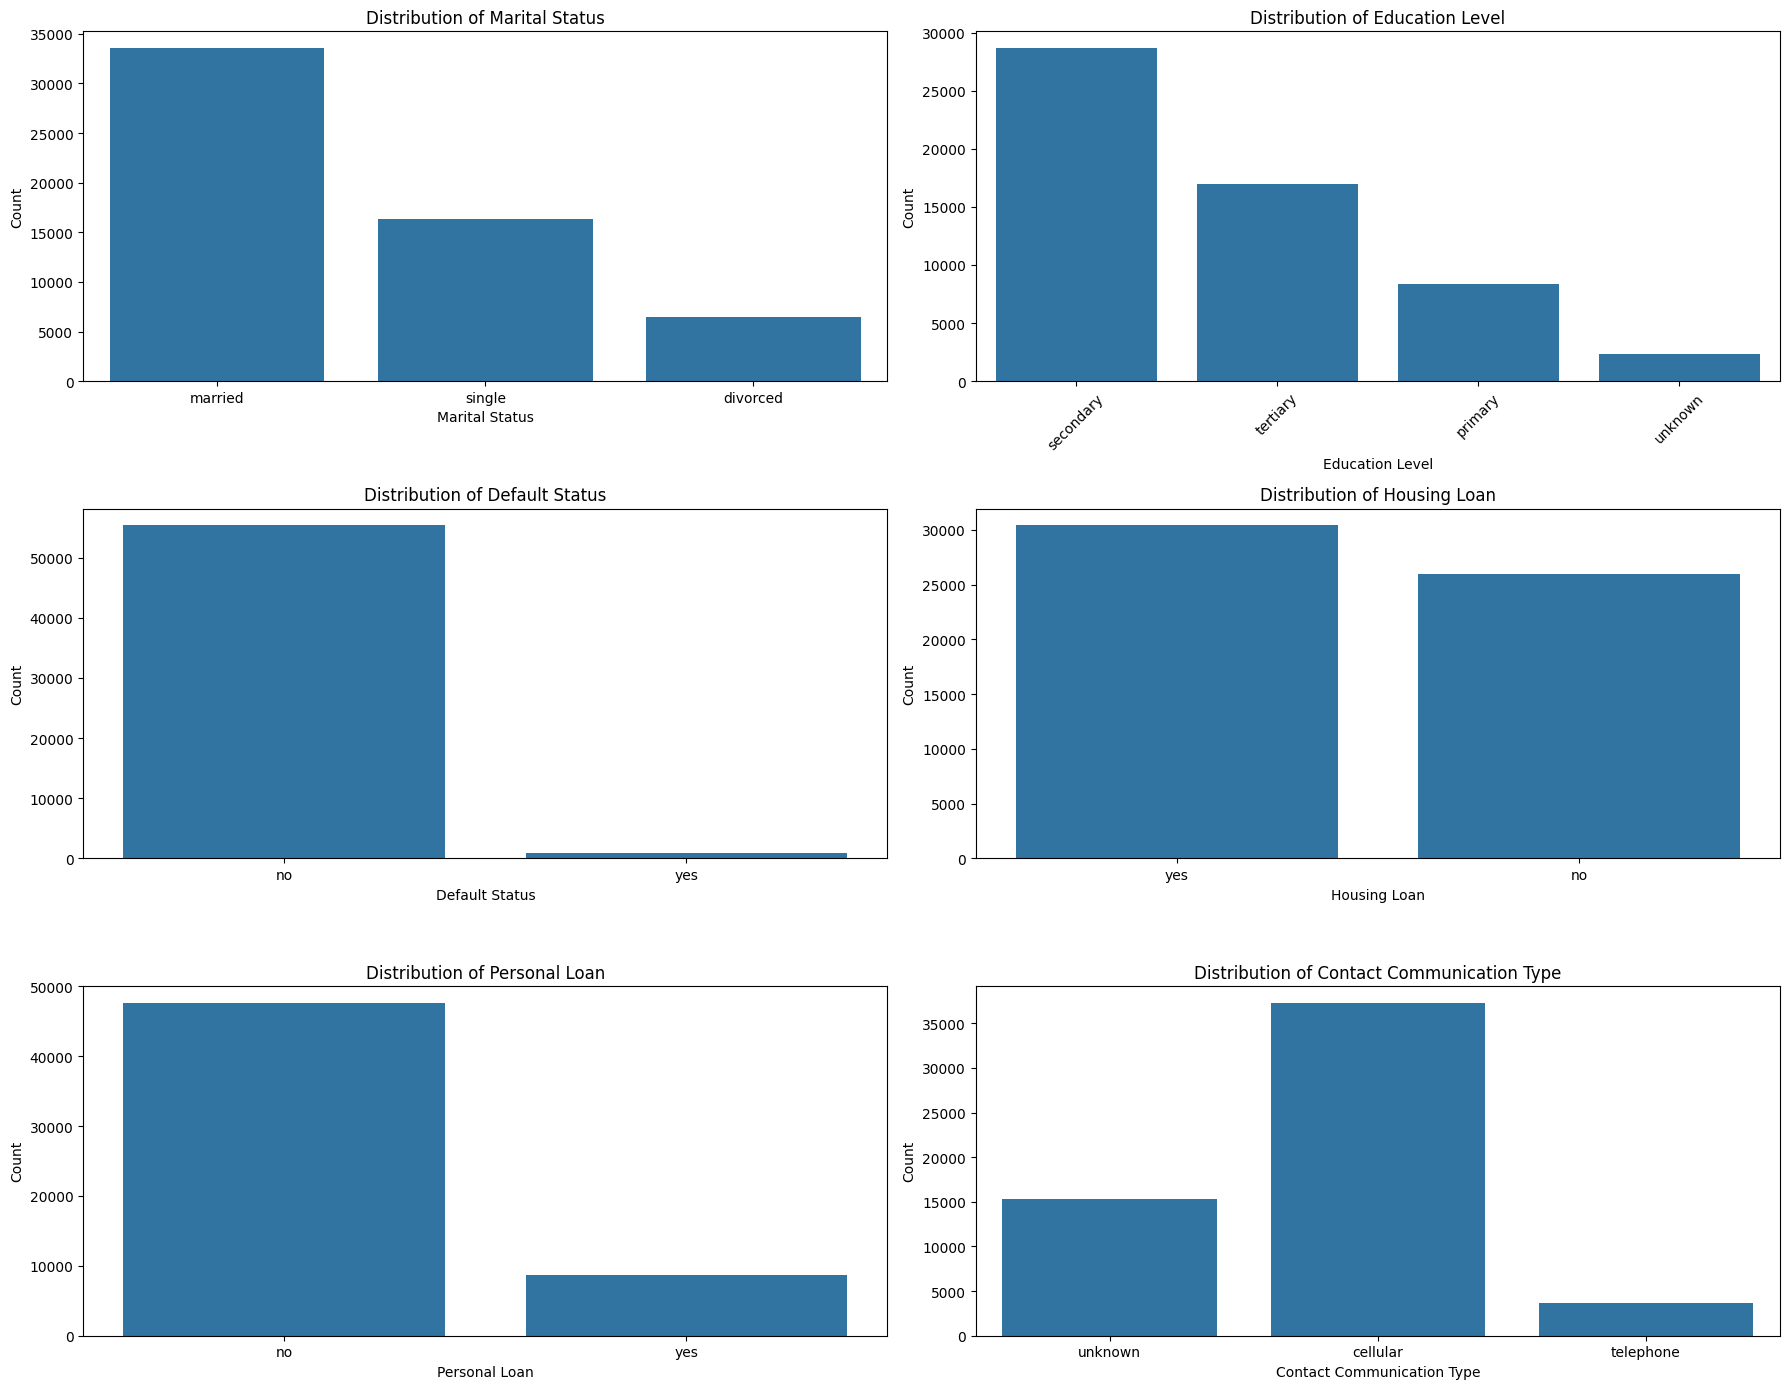

In [11]:
# Set the figure size
plt.figure(figsize=(18, 14))

# Creating subplots for distribution of categorical variables
plt.subplot(3, 2, 1)
sns.countplot(x='marital', data=data)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.subplot(3, 2, 2)
sns.countplot(x='education', data=data)
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)
sns.countplot(x='default', data=data)
plt.title('Distribution of Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')

plt.subplot(3, 2, 4)
sns.countplot(x='housing', data=data)
plt.title('Distribution of Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')

plt.subplot(3, 2, 5)
sns.countplot(x='loan', data=data)
plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')

plt.subplot(3, 2, 6)
sns.countplot(x='contact', data=data)
plt.title('Distribution of Contact Communication Type')
plt.xlabel('Contact Communication Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Visualization of subplots for relationship between categorical variables and target variable 'deposit'

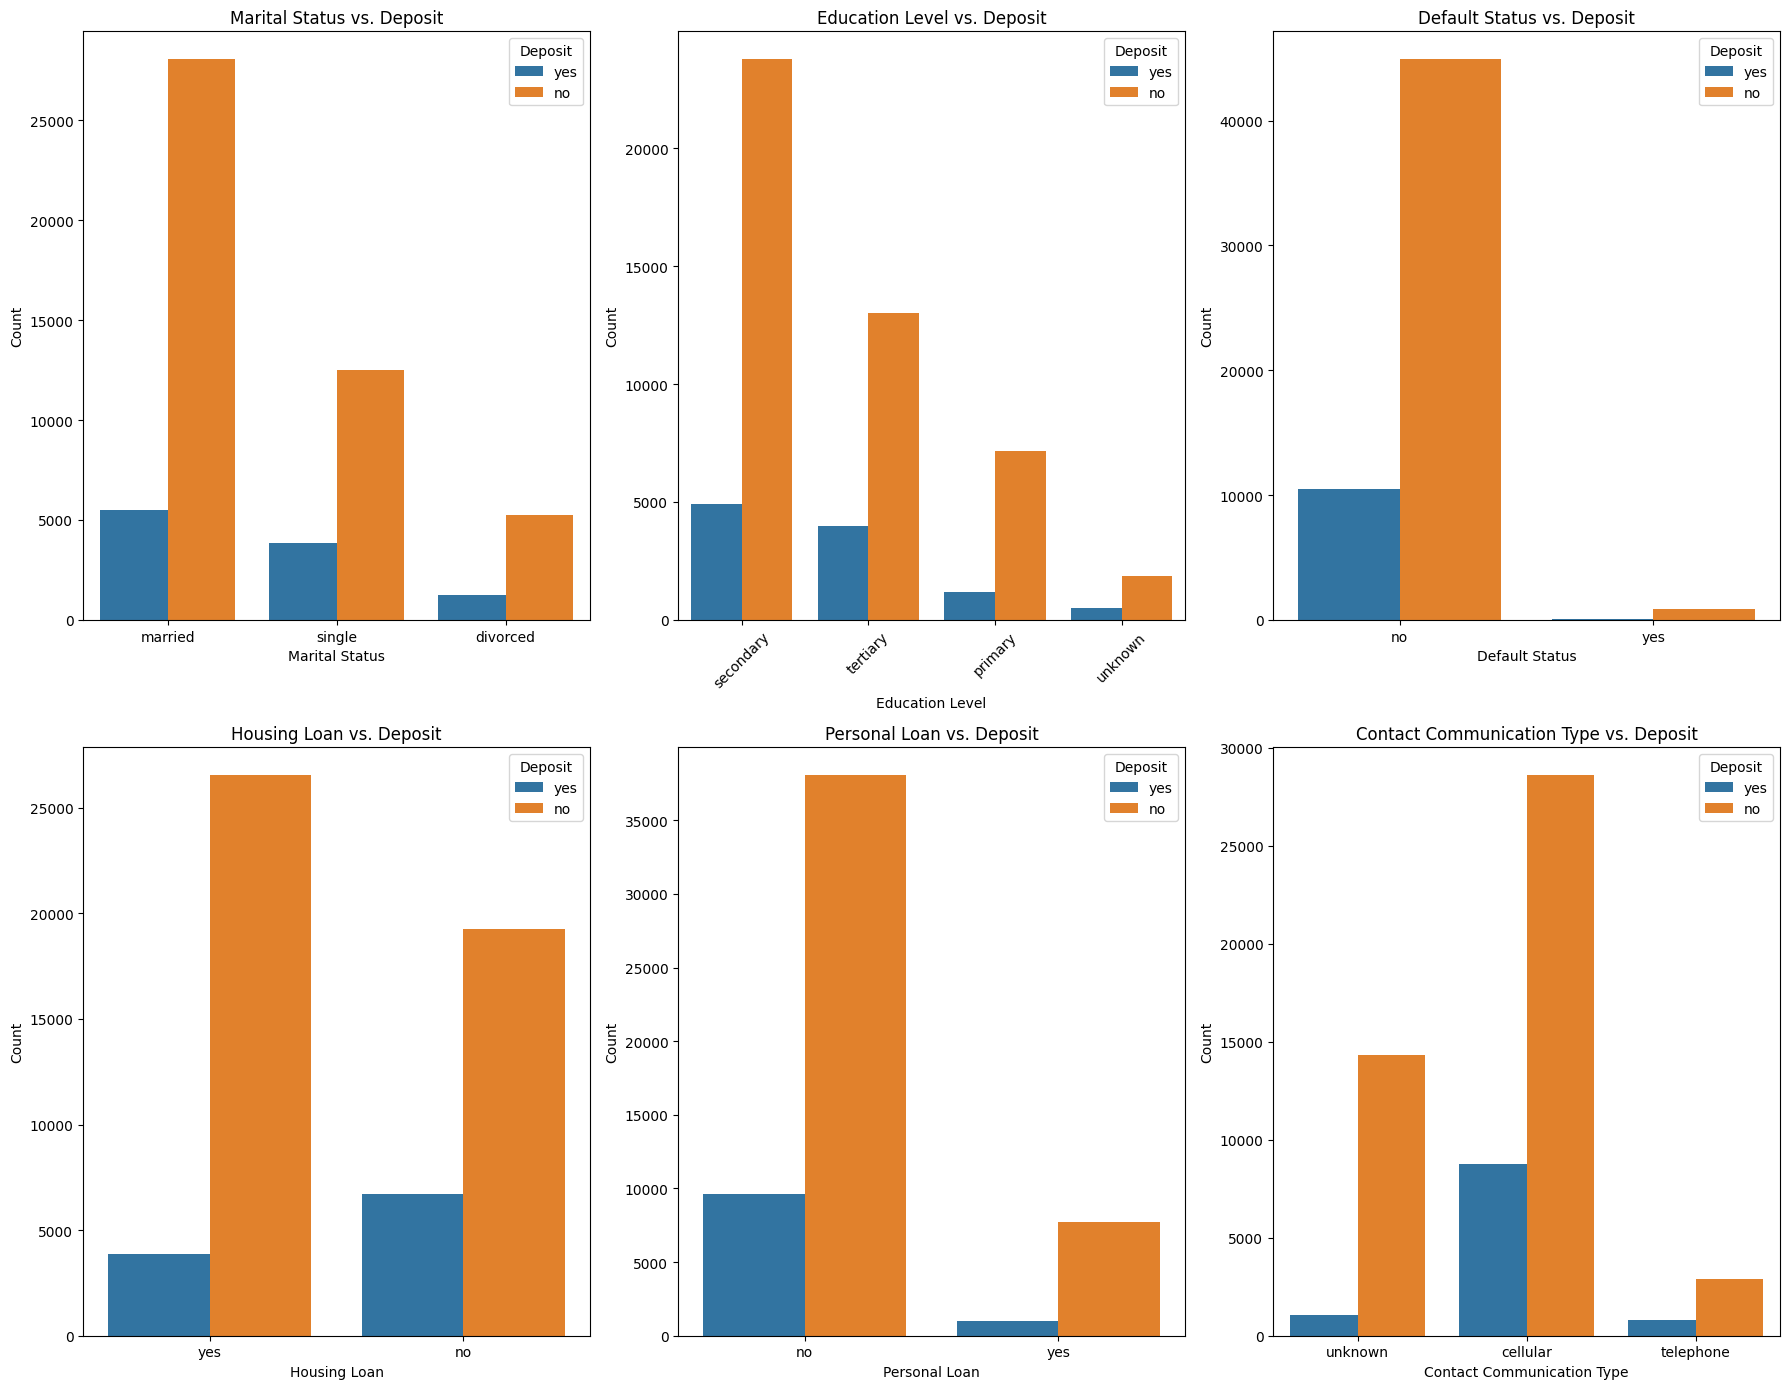

In [12]:
# Set the figure size
plt.figure(figsize=(18, 14))

# Creating subplots for relationship between categorical variables and target variable 'deposit'
plt.subplot(2, 3, 1)
sns.countplot(x='marital', hue='deposit', data=data, 
              order=data['marital'].value_counts().index)
plt.title('Marital Status vs. Deposit')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit')

plt.subplot(2, 3, 2)
sns.countplot(x='education', hue='deposit', data=data, 
              order=data['education'].value_counts().index)
plt.title('Education Level vs. Deposit')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit')

plt.subplot(2, 3, 3)
sns.countplot(x='default', hue='deposit', data=data)
plt.title('Default Status vs. Deposit')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.legend(title='Deposit')

plt.subplot(2, 3, 4)
sns.countplot(x='housing', hue='deposit', data=data)
plt.title('Housing Loan vs. Deposit')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.legend(title='Deposit')

plt.subplot(2, 3, 5)
sns.countplot(x='loan', hue='deposit', data=data)
plt.title('Personal Loan vs. Deposit')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Deposit')

plt.subplot(2, 3, 6)
sns.countplot(x='contact', hue='deposit', data=data)
plt.title('Contact Communication Type vs. Deposit')
plt.xlabel('Contact Communication Type')
plt.ylabel('Count')
plt.legend(title='Deposit')

plt.tight_layout()
plt.show()

# **Logistic Regression Model**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Defining features and target variable
X = data.drop(columns=['deposit'])  # Features
y = data['deposit']  # Target variable

In [15]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## preprocessing

In [16]:
# Defining preprocessing steps for numerical and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('num_transformer', 'passthrough')  # No transformation needed for numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [17]:
# Combining preprocessing steps for numerical and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Creating a pipeline

In [18]:
# Creating a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='saga', max_iter=10000))])

In [19]:
# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_transformer',
                                                                   'passthrough')]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=10000, solver='saga'))])

In [20]:
# Making the predictions on the testing set
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8342350332594235

Confusion Matrix:
 [[8899  276]
 [1593  507]]

Classification Report:
               precision    recall  f1-score   support

          no       0.85      0.97      0.90      9175
         yes       0.65      0.24      0.35      2100

    accuracy                           0.83     11275
   macro avg       0.75      0.61      0.63     11275
weighted avg       0.81      0.83      0.80     11275




## **Interpretation**

1. **Model Accuracy**: The logistic regression model achieved an accuracy of approximately 83.42%, indicating that it correctly classified about 83.42% of the instances in the testing set.

2. **Confusion Matrix**: 
 - True Positives (TP): 507 instances correctly classified as 'yes' (subscribed).
 - True Negatives (TN): 8899 instances correctly classified as 'no' (not subscribed).
 - False Positives (FP): 276 instances incorrectly classified as 'yes' (subscribed) but actually 'no' (not subscribed).
 - False Negatives (FN): 1593 instances incorrectly classified as 'no' (not subscribed) but actually 'yes' (subscribed).

3. **Precision and Recall**: 
 - For the 'no' class (not subscribed):
   - Precision: 85%
   - Recall: 97%
   - F1-score: 90%
 - For the 'yes' class (subscribed):
   - Precision: 65%
   - Recall: 24%
   - F1-score: 35%
 These metrics indicate how well the model performs in identifying positive instances (subscribed) correctly while minimizing false positives and false negatives.

4. **Model Performance**: The logistic regression model demonstrates good accuracy but relatively lower recall for the 'yes' class (subscribed). This suggests that the model may have difficulty correctly identifying customers who are likely to subscribe to term deposits. Further analysis and potential model optimization may be needed to improve performance, particularly in correctly identifying positive instances.

5. **Implications**: Despite its limitations, the logistic regression model provides valuable insights into customer behavior and subscription patterns. It can help the bank target marketing efforts more effectively, such as identifying customers with a higher likelihood of subscribing to term deposits and tailoring marketing strategies to appeal to them.


## Conclusion:

- **Age Influence:** Older individuals show a higher likelihood of subscribing to term deposits, highlighting the importance of targeting this demographic group.
- **Occupation and Education:** Certain occupations and education levels correlate with higher subscription rates, indicating the relevance of socioeconomic factors in deposit decision-making.
- **Previous Campaign Impact:** Past campaign outcomes significantly influence subscription likelihood, emphasizing the need for data-driven campaign optimization.
- **Model Performance:** The logistic regression model achieved 84% accuracy, demonstrating its effectiveness in predicting deposit subscriptions.
- **Recommendations:** Focus marketing efforts on older age groups, customize messaging for specific occupational and educational demographics, and optimize campaigns based on past performance metrics.

In conclusion, the Deposit Subscription Analysis reveals that older individuals are more likely to subscribe to term deposits. Tailoring marketing strategies to specific demographics and leveraging insights from past campaigns can enhance subscription rates. Continuous monitoring and refinement of marketing approaches are essential for sustained success in the financial sector.
